### 練習問題6-1

In [8]:
import pandas as pd
df = pd.read_csv('ex3.csv')

### 練習問題6-2

In [9]:
df.head(5)

,x0,x1,x2,x3,target
0,1.000943,2.114344,-1.148213,-0.051415,77.147293
1,1.505901,-0.626081,3.041686,-0.587336,278.595852
2,-0.390320,0.283607,-0.940359,-2.154124,-71.039904
3,-0.167273,1.413624,-0.632571,-1.016131,42.193870
4,-0.728801,1.370530,0.168298,-1.203904,89.167955


### 練習問題6-3

$target = A × x_0 + B × x_1 + C × x_2 + D × x_3 + Z$

### 練習問題6-4

In [10]:
df.isnull().any(axis = 0)

x0         True
x1        False
x2         True
x3        False
target    False
dtype: bool

In [11]:
df2 = df.fillna(df.median())

<Axes: xlabel='x0', ylabel='target'>

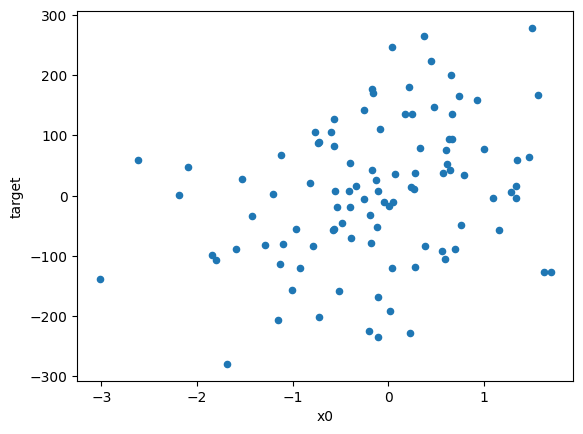

In [15]:
df2.plot(kind = 'scatter' , x = 'x0' , y = 'target')

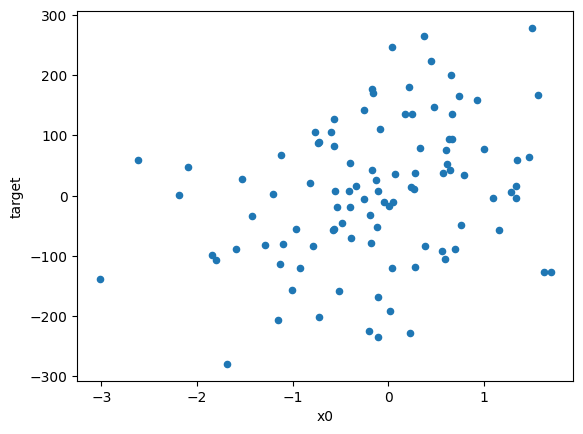

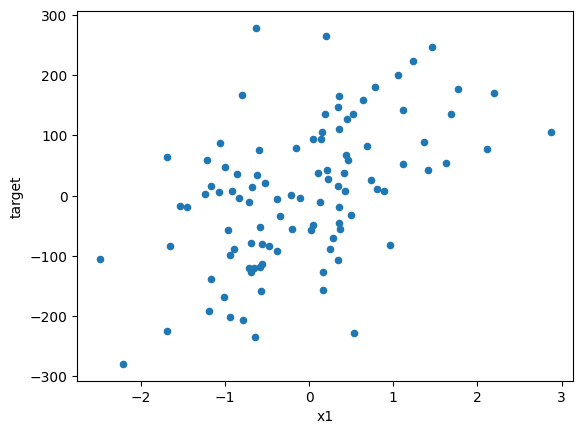

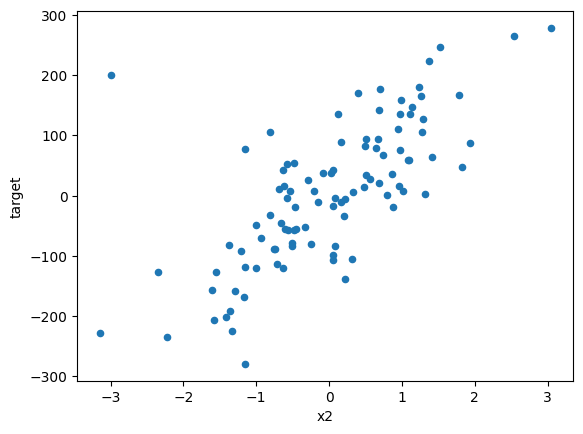

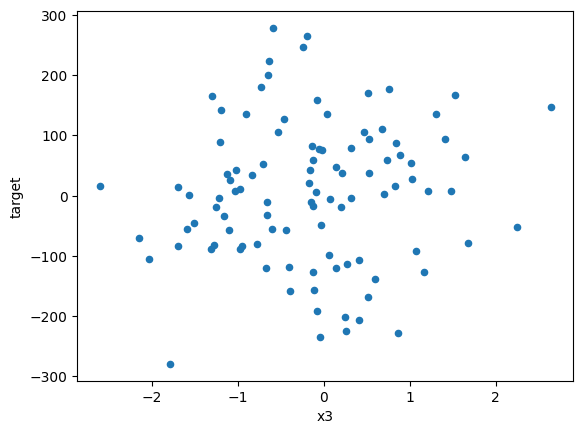

In [17]:
for i in df2.columns:
    if i == 'target':
      continue
    df2.plot(kind = 'scatter', x = i, y = 'target')

### 練習問題6-7

In [20]:
no = df2[(df2['target'] > 100) & (df2['x2'] < -2)].index

In [21]:
df3 = df2.drop(no, axis = 0)

### 練習問題6-8

In [30]:
x = df3.loc[: , :'x3']
t = df3['target']

### 練習問題6-9

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, t, test_size = 0.2, random_state = 1)

### 練習問題6-10

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 練習問題6-11

　平均絶対誤差は、数値を評価するのに専門知識が必要となる。一方決定係数は専門知識を必要としない。予測値と実測値の誤差を具体的な数値で知りたい場合は平均絶対誤差を、そうでないときや専門知識を備えていない場合は決定係数を使うというふうに使い分けるとよい。
　今回は、データセットが何のデータであるのか分からないため、評価するのが難しい。したがって、今回の場合は決定係数を使うべきである。

### 練習問題6-12

In [38]:
model.score(x_test,y_test)

0.982034507442197

一般的に決定係数は0.8を超えていると予測性能が高いとされている。このモデルの決定係数は0.98であるため、予測性能は高いと言える。